<a href="https://colab.research.google.com/github/longminh123/Nhapmonhocsau/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt 
import random # để chọn ngẫu nhiên các tấm ảnh
from keras.datasets import mnist # để load dữ liệu trong tập mẫu
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation

In [2]:
# load dữ liệu trng tập mẫu
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print("x_train shape",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


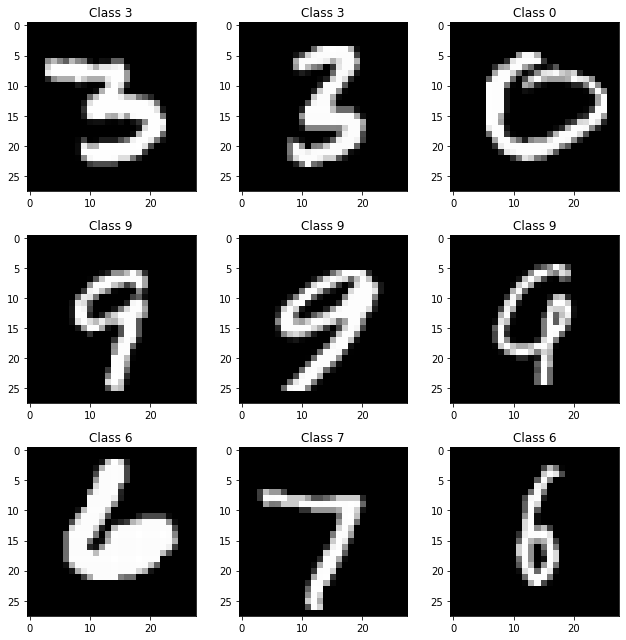

In [3]:
#hiển thị ngẫu nhiên các tấm ảnh trong tập train 
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [4]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

In [5]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

In [7]:
model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 8,700
Trainable params: 8,700
Non-trainabl

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
model.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 5s 7ms/step - loss: 0.6622 - accuracy: 0.8122
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3114 - accuracy: 0.9111
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2704 - accuracy: 0.9226
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2476 - accuracy: 0.9287
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2312 - accuracy: 0.9332


In [9]:
# dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
# giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)

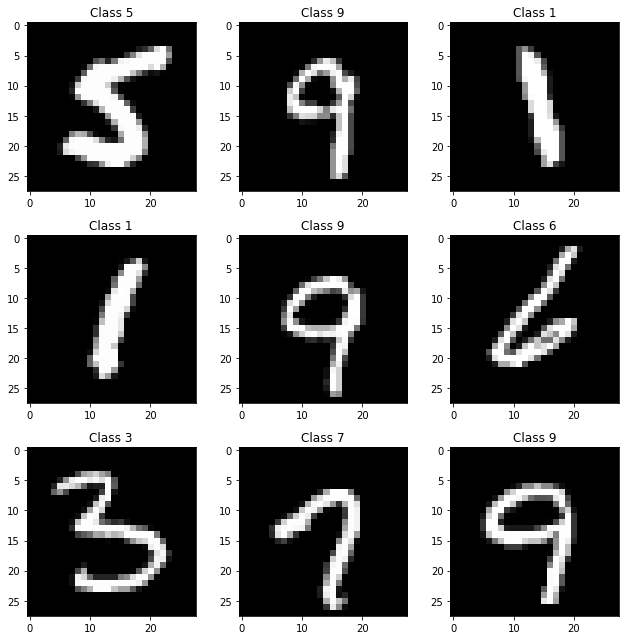

In [10]:
# xuất kết quả dự báo
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()

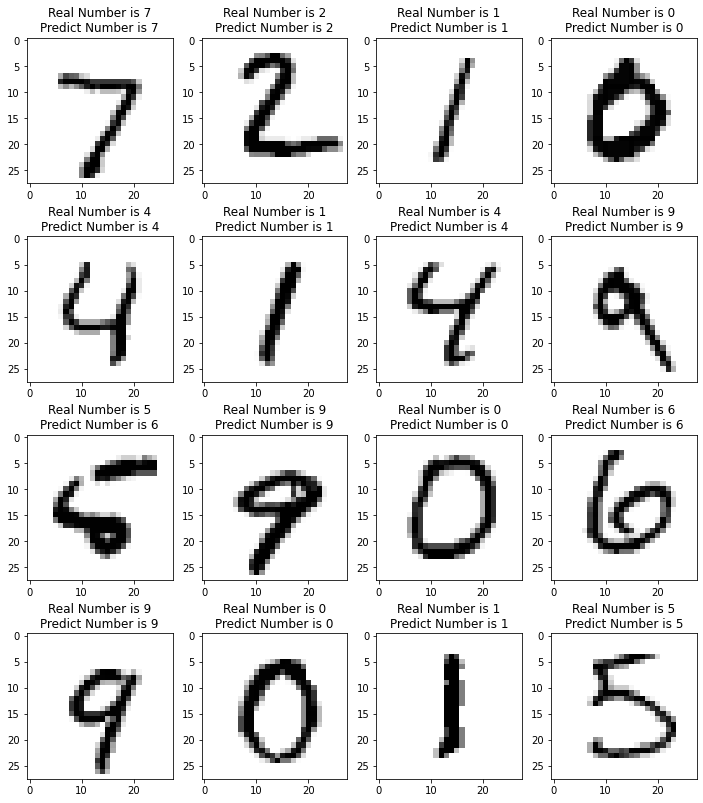

In [11]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");